# Import statements

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve data

In [4]:
# load bureau data from csv
# Local machine code

bureau_df = pd.read_csv('IS453 Group Assignment - Bureau Data.csv')
bureau_df.head()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
print(bureau_df.shape)

(1048575, 17)


In [6]:
# load filtered application data from csv
# load from local machine

filtered_application_df = pd.read_csv('application_filtered_dataset.csv')
filtered_application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,Family,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,Unaccompanied,Working,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Collapsing of rows with SAME SK_ID_CURR

## Create a empty dataframe to store the collapse columns

In [7]:
# Create dataframe with unique SK_ID_CURR
bureau_df_collapse = bureau_df[['SK_ID_CURR']].drop_duplicates().copy()
bureau_df_collapse.head()

,SK_ID_CURR
0,215354
7,162297
13,402440
14,238881
21,222183


In [8]:
print(bureau_df_collapse.shape)

(218292, 1)


## Collapse columns

Step 1: Create a markdown cell that tells us the column name and what is it and the purpose. <br>
Step 2: Create a copy of the bureau_df_collapse dataframe and add the column that you are merging. <br>
Step 3: Repeat step 1 for every single feature <br>
Step 4: Include a short and brief justification on the selected method used to collapse and merge the rows into 1.

CREDIT_ACTIVE <br>
- Status of credit facilities 

In [9]:
# split df_bureau['CREDIT_ACTIVE'] into 4 columns using its unique values ['CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Sold', 'CREDIT_ACTIVE_Bad debt']
ca = bureau_df_collapse.copy()
# count the number of each unique value in 'CREDIT_ACTIVE' for each SK_ID_CURR
credit_active_count = bureau_df.groupby('SK_ID_CURR')['CREDIT_ACTIVE'].value_counts().unstack().reset_index()
# add to ca dataframe
ca = ca.merge(credit_active_count, on='SK_ID_CURR', how='left')
# rename columns
ca = ca.rename(columns={'Bad debt': 'CREDIT_ACTIVE_Bad debt', 'Closed': 'CREDIT_ACTIVE_Closed', 'Active': 'CREDIT_ACTIVE_Active', 'Sold': 'CREDIT_ACTIVE_Sold'})
# show the first 5 rows
ca.head()

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,215354,6.0,NaN,5.0,NaN
1,162297,3.0,NaN,3.0,NaN
2,402440,1.0,NaN,NaN,NaN
3,238881,3.0,NaN,4.0,NaN
4,222183,4.0,NaN,2.0,NaN


CREDIT_CURRENCY <br>
- Recoded currency of the Credit Bureau credit 

In [10]:
cc = bureau_df_collapse.copy()
# count the number of unique 'CREDIT_CURRENCY' by 'SK_ID_CURR' for each currency type
credit_currency_count = bureau_df.groupby('SK_ID_CURR')['CREDIT_CURRENCY'].value_counts().unstack().reset_index()
# add to cc dataframe
cc = cc.merge(credit_currency_count, on='SK_ID_CURR', how='left')
# rename column
cc = cc.rename(columns={'currency 1': 'CREDIT_CURRENCY_1', 'currency 2': 'CREDIT_CURRENCY_2', 'currency 3': 'CREDIT_CURRENCY_3', 'currency 4': 'CREDIT_CURRENCY_4'})
# show first 5 rows
cc.head()

,SK_ID_CURR,CREDIT_CURRENCY_1,CREDIT_CURRENCY_2,CREDIT_CURRENCY_3,CREDIT_CURRENCY_4
0,215354,11.0,NaN,NaN,NaN
1,162297,6.0,NaN,NaN,NaN
2,402440,1.0,NaN,NaN,NaN
3,238881,7.0,NaN,NaN,NaN
4,222183,6.0,NaN,NaN,NaN


DAYS_CREDIT
- How many days before current application did client apply for Credit Bureau credit

In [11]:
dc = bureau_df_collapse.copy()
# calculate the mean and max values of 'DAYS_CREDIT' for 'Active' and 'Sold' for each 'SK_ID_CURR'
max_mean_active_sold_dc = bureau_df[bureau_df['CREDIT_ACTIVE'].isin(['Active', 'Sold'])].groupby(['SK_ID_CURR', 'CREDIT_ACTIVE'])['DAYS_CREDIT'].agg(['mean', 'max']).unstack().reset_index()
# calculate the mean and max values of 'DAYS_CREDIT' for 'Closed' and 'Bad debt' for each 'SK_ID_CURR' and combine them together as 'Others'
max_mean_others_dc = bureau_df[bureau_df['CREDIT_ACTIVE'].isin(['Closed', 'Bad debt'])].groupby(['SK_ID_CURR', 'CREDIT_ACTIVE'])['DAYS_CREDIT'].agg(['mean', 'max']).unstack().reset_index()
# Flatten the multi-level column index
max_mean_active_sold_dc.columns = ['_'.join([str(j) for j in i]).strip() if i[0] != 'SK_ID_CURR' else i[0] for i in max_mean_active_sold_dc.columns.values]
max_mean_others_dc.columns = ['_'.join([str(j) for j in i]).strip() if i[0] != 'SK_ID_CURR' else i[0] for i in max_mean_others_dc.columns.values]
# Merge bad debt and closed into others
max_mean_others_dc['DAYS_CREDIT_Others_mean'] = max_mean_others_dc['mean_Bad debt'] + max_mean_others_dc['mean_Closed']
max_mean_others_dc['DAYS_CREDIT_Others_max'] = max_mean_others_dc['max_Bad debt'] + max_mean_others_dc['max_Closed']
# drop columns
max_mean_others_dc.drop(columns=['mean_Bad debt', 'mean_Closed', 'max_Bad debt', 'max_Closed'], inplace=True)
# merge dataframes
dc = dc.merge(max_mean_active_sold_dc, on='SK_ID_CURR', how='left')
dc = dc.merge(max_mean_others_dc, on='SK_ID_CURR', how='left')
# rename columns
dc = dc.rename(columns={'mean_Active': 'DAYS_CREDIT_Active_mean', 'mean_Sold': 'DAYS_CREDIT_Sold_mean', 'max_Active': 'DAYS_CREDIT_Active_max', 'max_Sold': 'DAYS_CREDIT_Sold_max'})
# show first 5 rows
dc.head()

,SK_ID_CURR,DAYS_CREDIT_Active_mean,DAYS_CREDIT_Sold_mean,DAYS_CREDIT_Active_max,DAYS_CREDIT_Sold_max,DAYS_CREDIT_Others_mean,DAYS_CREDIT_Others_max
0,215354,-259.833333,NaN,-43.0,NaN,NaN,NaN
1,162297,-856.333333,NaN,-277.0,NaN,NaN,NaN
2,402440,-96.000000,NaN,-96.0,NaN,NaN,NaN
3,238881,-289.333333,NaN,-95.0,NaN,NaN,NaN
4,222183,-567.000000,NaN,-315.0,NaN,NaN,NaN


CREDIT_DAY_OVERDUE: <br>
- Number of days past due on CB credit at the time of application for related loan in our sample <bR>
- It tells us how many days a borrower's payment is overdue on their credit at the time they are applying for a new loan. It helps the lender see if the borrower has been late with payments in the past, which can affect their decision to approve the new loan or not."

In [12]:
# Average CREDIT_DAY_OVERDUE
cdo = bureau_df_collapse.copy()

# calculate the average CREDIT_DAY_OVERDUE for each SK_ID_CURR
avg_credit_day_overdue = bureau_df.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].mean().reset_index()
# add to cdo dataframe
cdo = cdo.merge(avg_credit_day_overdue, on='SK_ID_CURR', how='left')
# rename column
cdo = cdo.rename(columns={'CREDIT_DAY_OVERDUE': 'CREDIT_DAY_OVERDUE_MEAN'})
# show first 5 rows
cdo.head()

,SK_ID_CURR,CREDIT_DAY_OVERDUE_MEAN
0,215354,0.0
1,162297,0.0
2,402440,0.0
3,238881,0.0
4,222183,0.0


DAYS_CREDIT_ENDDATE


*   Remaining duration of CB credit (in days) at the time of application in Home Credit



In [13]:
# Max and Mean of DAYS_CREDIT_ENDDATE
dce = bureau_df_collapse.copy()

active_df = bureau_df[bureau_df['CREDIT_ACTIVE'] == 'Active']

days_credit_enddate_df = active_df.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].agg(['max', 'mean']).reset_index()
days_credit_enddate_df.columns = ['SK_ID_CURR', 'DAYS_CREDIT_ENDDATE_MAX', 'DAYS_CREDIT_ENDDATE_MEAN']

# add to dce dataframe
dce = dce.merge(days_credit_enddate_df, on='SK_ID_CURR', how='left')
# rename column
dce = dce.rename(columns={'DAYS_CREDIT_ENDDATE_MAX': 'DAYS_CREDIT_ENDDATE_ACTIVE_MAX', 'DAYS_CREDIT_ENDDATE_MEAN': 'DAYS_CREDIT_ENDDATE_ACTIVE_MEAN'})
# show first 5 rows
dce.head()

,SK_ID_CURR,DAYS_CREDIT_ENDDATE_ACTIVE_MAX,DAYS_CREDIT_ENDDATE_ACTIVE_MEAN
0,215354,27460.0,6067.800000
1,162297,5261.0,1532.333333
2,402440,269.0,269.000000
3,238881,1720.0,1720.000000
4,222183,1512.0,1144.000000


DAYS_ENDDATE_FACT


*   Days since CB credit ended at the time of application in Home Credit (only for closed credit)



In [14]:
# Min and Mean of DAYS_ENDDATE_FACT
def_df = bureau_df_collapse.copy()

closed_df = bureau_df[bureau_df['CREDIT_ACTIVE'] == 'Closed']

days_enddate_fact_df = closed_df.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].agg(['max', 'mean']).reset_index()
days_enddate_fact_df.columns = ['SK_ID_CURR', 'DAYS_ENDDATE_FACT_MIN', 'DAYS_ENDDATE_FACT_MEAN']

# add to def_df dataframe
def_df = def_df.merge(days_enddate_fact_df, on='SK_ID_CURR', how='left')

# show first 5 rows
def_df.head()

,SK_ID_CURR,DAYS_ENDDATE_FACT_MIN,DAYS_ENDDATE_FACT_MEAN
0,215354,-153.0,-889.80
1,162297,-825.0,-1125.00
2,402440,NaN,NaN
3,238881,-77.0,-963.75
4,222183,-343.0,-1451.00


AMT_CREDIT_MAX_OVERDUE

*   AMT_CREDIT_MAX_OVERDUE
*   AMT_CREDIT_SUM (used for ratio): Current credit amount for the Credit Bureau credit



In [15]:
# Ratio: AMT_CREDIT_MAX_OVERDUE / AMT_CREDIT_SUM
acmo = bureau_df_collapse.copy()

ratio_df = bureau_df.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_MAX_OVERDUE': 'sum',
    'AMT_CREDIT_SUM': 'sum'
}).reset_index()

ratio_df['ratio_credit_overdue'] = ratio_df['AMT_CREDIT_MAX_OVERDUE'] / ratio_df['AMT_CREDIT_SUM']

columns_to_drop = [ 'AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM' ]
ratio_df.drop(columns=columns_to_drop, inplace=True)

# add to acmo dataframe
acmo = acmo.merge(ratio_df, on='SK_ID_CURR', how='left')

# rename column
acmo = acmo.rename(columns={'ratio_credit_overdue': 'CREDIT_OVERDUE_RATIO'})
# show first 5 rows
acmo.head()

,SK_ID_CURR,CREDIT_OVERDUE_RATIO
0,215354,0.013002
1,162297,0.001821
2,402440,0.000000
3,238881,0.000000
4,222183,0.018642


CNT_CREDIT_PROLONG <br>
- How many times was the Credit Bureau credit prolonged
<br>
- It refers to the number of times a specific credit facility, such as a loan or credit card, has been prolonged or extended. For each credit facility that the borrower has, this field tells us how many times the borrower has asked to extend the duration of that specific credit account. This information helps the lender understand the borrower's behavior with regards to extending the repayment period of their credit accounts. It gives them insight into whether the borrower has needed extra time to repay their debts in the past for each specific credit facility."

In [16]:
# Total CNT_CREDIT_PROLONG
ccp = bureau_df_collapse.copy()

# calculate the total CNT_CREDIT_PROLONG for each SK_ID_CURR
total_cnt_credit_prolong = bureau_df.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].sum().reset_index()
# add to ccp dataframe
ccp = ccp.merge(total_cnt_credit_prolong, on='SK_ID_CURR', how='left')
# rename column
ccp = ccp.rename(columns={'CNT_CREDIT_PROLONG': 'CNT_CREDIT_PROLONG_TOTAL'})
# show first 5 rows
ccp.head()

,SK_ID_CURR,CNT_CREDIT_PROLONG_TOTAL
0,215354,0
1,162297,0
2,402440,0
3,238881,0
4,222183,0


AMT_CREDIT_SUM (Active only)

- Current credit amount for the Credit Bureau credit 

In [17]:
active_credits = bureau_df[bureau_df['CREDIT_ACTIVE'] == 'Active']
grouped_data = active_credits.groupby("SK_ID_CURR")["AMT_CREDIT_SUM"].agg(
    AMT_CREDIT_SUM_MEAN='mean',
    AMT_CREDIT_SUM_TOTAL='sum'
)
acs = bureau_df_collapse.copy()
acs = pd.merge(acs, grouped_data, on="SK_ID_CURR", how="left")
acs = acs.rename(columns={'AMT_CREDIT_SUM_MEAN': 'AMT_CREDIT_SUM_ACTIVE_MEAN', 'AMT_CREDIT_SUM_TOTAL': 'AMT_CREDIT_SUM_ACTIVE_TOTAL'})
acs.head()

,SK_ID_CURR,AMT_CREDIT_SUM_ACTIVE_MEAN,AMT_CREDIT_SUM_ACTIVE_TOTAL
0,215354,616904.55,3701427.3
1,162297,2458500.00,7375500.0
2,402440,89910.00,89910.0
3,238881,256500.00,769500.0
4,222183,1296848.25,5187393.0


AMT_CREDIT_SUM_DEBT
- Current debt on Credit Bureau credit
- It is the total amount of money you still owe for a specific credit facility, like a loan or a credit card. This field helps the lender understand how much money you still owe for each specific credit facility. It tells them the total amount of debt that you haven't paid back yet. It's important for the lender to know this information when they are deciding whether to approve a new loan or credit application, as it shows how much of your current income is already committed to paying off debts."

In [18]:
# AMT_CREDIT_SUM_DEBT
cds = bureau_df_collapse.copy()

# calculate the total AMT_CREDIT_SUM_DEBT for each SK_ID_CURR with status 'Active' and 'Sold' respectively
active_amt_credit_sum_debt = bureau_df[(bureau_df['CREDIT_ACTIVE'] == 'Active')].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().reset_index()
sold_amt_credit_sum_debt = bureau_df[(bureau_df['CREDIT_ACTIVE'] == 'Sold')].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum().reset_index()
# add to cds dataframe
cds = cds.merge(active_amt_credit_sum_debt, on='SK_ID_CURR', how='left')
cds = cds.merge(sold_amt_credit_sum_debt, on='SK_ID_CURR', how='left')
# rename column
cds = cds.rename(columns={'AMT_CREDIT_SUM_DEBT_x': 'AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL', 'AMT_CREDIT_SUM_DEBT_y': 'AMT_CREDIT_SUM_DEBT_SOLD_TOTAL'})

# show first 5 rows
cds.head()

,SK_ID_CURR,AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL,AMT_CREDIT_SUM_DEBT_SOLD_TOTAL
0,215354,284463.180,NaN
1,162297,0.000,NaN
2,402440,76905.000,NaN
3,238881,552730.500,NaN
4,222183,1185081.885,NaN


AMT_CREDIT_SUM_LIMIT
- Current credit limit of credit card reported in Credit Bureau
- This field helps the lender understand the maximum amount of credit available to you for each specific credit facility. It shows the highest amount of money that you can borrow or spend using that credit card or loan. Lenders use this information to assess your creditworthiness and financial capacity when deciding whether to approve a new loan or credit application.


In [19]:
acsl = bureau_df_collapse.copy()

grouped_data = bureau_df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].agg(
    AMT_CREDIT_SUM_LIMIT_Max='max',
    AMT_CREDIT_SUM_LIMIT_Mean='mean'
).reset_index()

acsl = acsl.merge(grouped_data, on="SK_ID_CURR", how="left")
acsl = acsl.rename(columns={'AMT_CREDIT_SUM_LIMIT_Max': 'AMT_CREDIT_SUM_LIMIT_MAX', 'AMT_CREDIT_SUM_LIMIT_Mean': 'AMT_CREDIT_SUM_LIMIT_MEAN'})
acsl.head()

,SK_ID_CURR,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_MEAN
0,215354,108982.620,36327.54000
1,162297,0.000,0.00000
2,402440,0.000,0.00000
3,238881,228320.100,76106.70000
4,222183,411.615,102.90375


AMT_CREDIT_SUM_OVERDUE
- Current amount overdue on Credit Bureau credit
- This field helps the lender understand if you have any overdue payments for each specific credit facility. It shows the total amount of money that you owe, but haven't paid back by the due date. Lenders use this information to assess your creditworthiness and financial responsibility when deciding whether to approve a new loan or credit application.

In [20]:
# Total AMT_CREDIT_SUM_OVERDUE
acso = bureau_df_collapse.copy()

# calculate the total AMT_CREDIT_SUM_OVERDUE for each SK_ID_CURR
total_amt_credit_sum_overdue = bureau_df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index()
# add to acso dataframe
acso = acso.merge(total_amt_credit_sum_overdue, on='SK_ID_CURR', how='left')
# rename column
acso = acso.rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'AMT_CREDIT_SUM_OVERDUE_TOTAL'})
# show first 5 rows
acso.head()

,SK_ID_CURR,AMT_CREDIT_SUM_OVERDUE_TOTAL
0,215354,0.0
1,162297,0.0
2,402440,0.0
3,238881,0.0
4,222183,0.0


CREDIT_TYPE
- Type of Credit Bureau credit (Car, cash,...)

In [21]:
# Count CREDIT_TYPE
ct = bureau_df_collapse.copy()

# calculate the CREDIT_TYPE count for each SK_ID_CURR
credit_type_count = bureau_df.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique()
# add to ct dataframe
ct = ct.merge(credit_type_count, on='SK_ID_CURR', how='left')
# rename column
ct = ct.rename(columns={'CREDIT_TYPE': 'CREDIT_TYPE_UNIQUE_COUNT'})
# show first 5 rows
ct.head()

,SK_ID_CURR,CREDIT_TYPE_UNIQUE_COUNT
0,215354,3
1,162297,3
2,402440,1
3,238881,2
4,222183,3


In [22]:
# Add a new column to the filtered_application_df to indicate if the each customer taken a car loan before , if have is 1 else 0
car_loan = bureau_df.groupby('SK_ID_CURR')['CREDIT_TYPE'].apply(lambda x: 'Car loan' in x.values).reset_index()
# rename column 
car_loan = car_loan.rename(columns={'CREDIT_TYPE': 'CAR_LOAN_TAKEN'})
# add column to ct dataframe
ct = ct.merge(car_loan, on='SK_ID_CURR', how='left')
# show the first 5 rows 
ct.head()

,SK_ID_CURR,CREDIT_TYPE_UNIQUE_COUNT,CAR_LOAN_TAKEN
0,215354,3,True
1,162297,3,False
2,402440,1,False
3,238881,2,False
4,222183,3,True


DAYS_CREDIT_UPDATE
- How many days before loan application did last information about the Credit Bureau credit come
- It tells us how many days ago the information about a specific credit facility, like a loan or a credit card, was last updated in the credit bureau records. This field helps the lender understand how recently the information about each specific credit facility was updated. It gives them an idea of whether the information they have is up-to-date and accurate. Lenders use this information to assess your creditworthiness and make decisions about approving new loans or credit applications.

In [23]:
# Min DAYS_CREDIT_UPDATE
dcu = bureau_df_collapse.copy()

# calculate min DAYS_CREDIT_UPDATE for each SK_ID_CURR
min_days_credit_update = bureau_df.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].min().reset_index()
# add to dcu dataframe
dcu = dcu.merge(min_days_credit_update, on='SK_ID_CURR', how='left')
# rename column
dcu = dcu.rename(columns={'DAYS_CREDIT_UPDATE': 'DAYS_CREDIT_UPDATE_MIN'})
# show first 10 rows
dcu.head(10)

,SK_ID_CURR,DAYS_CREDIT_UPDATE_MIN
0,215354,-1336
1,162297,-1710
2,402440,-22
3,238881,-2601
4,222183,-2559
5,426155,-2345
6,136226,-351
7,400486,-708
8,435112,-1322
9,452585,-2344


AMT_ANNUITY
- Annuity of the Credit Bureau credit
- It tells us the fixed amount of money that you have to pay back every month for a specific credit facility, like a loan. This field helps the lender understand how much you have to pay back each month for each specific credit facility. It shows the regular amount of money that you have committed to repay for that loan or credit card. Lenders use this information to assess your ability to make regular payments and manage your finances when deciding whether to approve a new loan or credit application."

In [24]:
# AMT_ANNUITY
aa = bureau_df_collapse.copy()

# calculate the total AMT_ANNUITY for each SK_ID_CURR for active and sold credit
active_total_amt_annuity = bureau_df[(bureau_df['CREDIT_ACTIVE'] == 'Active')].groupby('SK_ID_CURR')['AMT_ANNUITY'].sum().reset_index()
sold_total_amt_annuity = bureau_df[(bureau_df['CREDIT_ACTIVE'] == 'Sold')].groupby('SK_ID_CURR')['AMT_ANNUITY'].sum().reset_index()
# add to aa dataframe
aa = aa.merge(active_total_amt_annuity, on='SK_ID_CURR', how='left')
aa = aa.merge(sold_total_amt_annuity, on='SK_ID_CURR', how='left')
# rename column
aa = aa.rename(columns={'AMT_ANNUITY_x': 'AMT_ANNUITY_ACTIVE_TOTAL', 'AMT_ANNUITY_y': 'AMT_ANNUITY_SOLD_TOTAL'})
# show first 5 rows
aa.head()


,SK_ID_CURR,AMT_ANNUITY_ACTIVE_TOTAL,AMT_ANNUITY_SOLD_TOTAL
0,215354,0.0,NaN
1,162297,0.0,NaN
2,402440,0.0,NaN
3,238881,0.0,NaN
4,222183,0.0,NaN


# Combine all dataframe created in the previous step

In [25]:
# Check number of unique SK_ID_CURR in bureau_df
print(f"Number of unique SK_ID_CURR in bureau_df: {bureau_df['SK_ID_CURR'].nunique()}")

# Check number of unique SK_ID_CURR in bureau_collapsed_df
print(f"Number of unique SK_ID_CURR in bureau_collapsed_df: {bureau_df_collapse['SK_ID_CURR'].nunique()}")

Number of unique SK_ID_CURR in bureau_df: 218292
Number of unique SK_ID_CURR in bureau_collapsed_df: 218292


In [26]:
# Create copy for merging 
bureau_features = bureau_df_collapse.copy()

# Merging all the features
bureau_features = bureau_features.merge(ca, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(cc, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(dc, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(cdo, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(dce, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(def_df, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(acmo, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(ccp, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(acs, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(cds, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(acsl, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(acso, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(ct, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(dcu, on='SK_ID_CURR', how='left')
bureau_features = bureau_features.merge(aa, on='SK_ID_CURR', how='left')

# Check the shape of the new dataframe
print(f"Shape of bureau_features: {bureau_features.shape}")

# Check the number of unique SK_ID_CURR in the merged dataframe
print(f"Number of unique SK_ID_CURR in bureau_features: {bureau_features['SK_ID_CURR'].nunique()}")

# show first 5 rows
bureau_features.head()


Shape of bureau_features: (218292, 34)
Number of unique SK_ID_CURR in bureau_features: 218292


,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_1,CREDIT_CURRENCY_2,CREDIT_CURRENCY_3,CREDIT_CURRENCY_4,DAYS_CREDIT_Active_mean,...,AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL,AMT_CREDIT_SUM_DEBT_SOLD_TOTAL,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_MEAN,AMT_CREDIT_SUM_OVERDUE_TOTAL,CREDIT_TYPE_UNIQUE_COUNT,CAR_LOAN_TAKEN,DAYS_CREDIT_UPDATE_MIN,AMT_ANNUITY_ACTIVE_TOTAL,AMT_ANNUITY_SOLD_TOTAL
0,215354,6.0,NaN,5.0,NaN,11.0,NaN,NaN,NaN,-259.833333,...,284463.180,NaN,108982.620,36327.54000,0.0,3,True,-1336,0.0,NaN
1,162297,3.0,NaN,3.0,NaN,6.0,NaN,NaN,NaN,-856.333333,...,0.000,NaN,0.000,0.00000,0.0,3,False,-1710,0.0,NaN
2,402440,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-96.000000,...,76905.000,NaN,0.000,0.00000,0.0,1,False,-22,0.0,NaN
3,238881,3.0,NaN,4.0,NaN,7.0,NaN,NaN,NaN,-289.333333,...,552730.500,NaN,228320.100,76106.70000,0.0,2,False,-2601,0.0,NaN
4,222183,4.0,NaN,2.0,NaN,6.0,NaN,NaN,NaN,-567.000000,...,1185081.885,NaN,411.615,102.90375,0.0,3,True,-2559,0.0,NaN


# Merge the bureau features with the application data

In [27]:
# Check the number of unique SK_ID_CURR in the application dataset
print(f"Number of unique SK_ID_CURR in the application dataset: {filtered_application_df['SK_ID_CURR'].nunique()}")

# Check the number of columns in the application dataset
print(f"Number of columns in the application dataset: {filtered_application_df.shape[1]}")


Number of unique SK_ID_CURR in the application dataset: 307511
Number of columns in the application dataset: 78


In [28]:
# Merge the application dataset with the bureau features
merged_df = filtered_application_df.merge(bureau_features, on='SK_ID_CURR', how='left')

# Check the shape of the merged dataframe
print(f"Shape of merged_df: {merged_df.shape}")

# Check the number of unique SK_ID_CURR in the merged dataframe
print(f"Number of unique SK_ID_CURR in merged_df: {merged_df['SK_ID_CURR'].nunique()}")

# Show the first 5 rows of the merged dataframe
merged_df.head()

Shape of merged_df: (307511, 111)
Number of unique SK_ID_CURR in merged_df: 307511


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL,AMT_CREDIT_SUM_DEBT_SOLD_TOTAL,AMT_CREDIT_SUM_LIMIT_MAX,AMT_CREDIT_SUM_LIMIT_MEAN,AMT_CREDIT_SUM_OVERDUE_TOTAL,CREDIT_TYPE_UNIQUE_COUNT,CAR_LOAN_TAKEN,DAYS_CREDIT_UPDATE_MIN,AMT_ANNUITY_ACTIVE_TOTAL,AMT_ANNUITY_SOLD_TOTAL
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,Unaccompanied,Working,...,0.0,NaN,31988.565,10662.855,0.0,2.0,False,-1185.0,0.0,NaN
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,Family,State servant,...,0.0,NaN,810000.000,202500.000,0.0,2.0,False,-2131.0,0.0,NaN
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,Working,...,NaN,NaN,0.000,0.000,0.0,1.0,False,-682.0,NaN,NaN
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,Unaccompanied,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Extraction

In [29]:
# Debt to income ratio
merged_df['DEBT_TO_INCOME_RATIO'] = merged_df['AMT_CREDIT'] + merged_df['AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL']/ merged_df['AMT_INCOME_TOTAL']
# remove original columns
merged_df.drop(columns=['AMT_CREDIT', 'AMT_CREDIT_SUM_DEBT_ACTIVE_TOTAL', 'AMT_INCOME_TOTAL'], inplace=True)

# Total annuity 
merged_df['TOTAL_ANNUITY'] = merged_df['AMT_ANNUITY'] + merged_df['AMT_ANNUITY_ACTIVE_TOTAL'] 
# remove original columns
merged_df.drop(columns=['AMT_ANNUITY', 'AMT_ANNUITY_ACTIVE_TOTAL'], inplace=True)

print(merged_df.shape)

(307511, 108)


# Feature Selection based on Correlation

92


<Axes: >

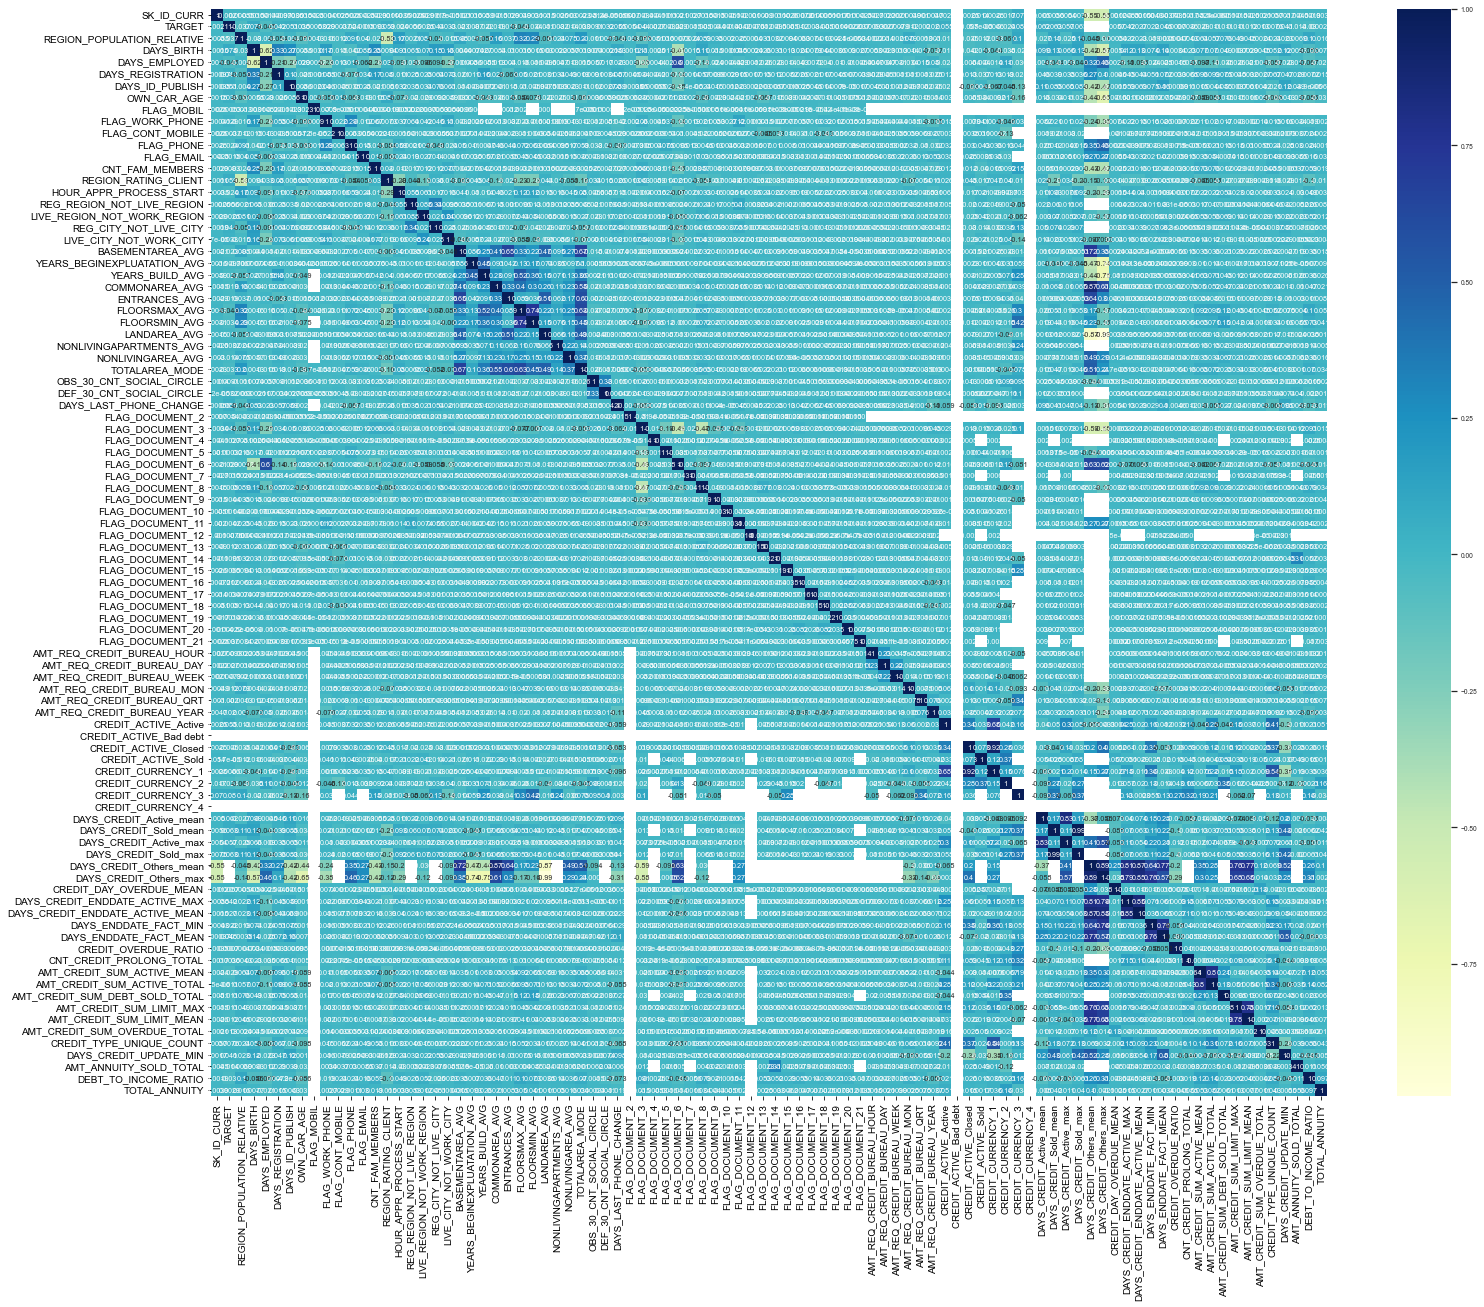

In [30]:
# Get a list of columns that has numerical values
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns.tolist()
print(len(numeric_columns))

# generate correlation maxtrix
cor = merged_df[numeric_columns].corr()
fig, ax = plt.subplots(figsize=(25,20))
sns.set(font_scale=0.6)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, cmap="YlGnBu", ax=ax)

In [31]:
# Find pairs
pairs = cor.unstack().reset_index()
pairs.columns = ['Var1', 'Var2', 'Correlation']

# Remove self-correlation
pairs = pairs[pairs['Var1'] != pairs['Var2']]

# Filter by correlation value > 0.8
high_corr_pairs = pairs[abs(pairs['Correlation']) > 0.8]

# Sort by correlation just for better visibility
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Formatting the output as requested
for index, row in high_corr_pairs.iterrows():
    print(f"{index + 1}. {row['Var1']} | {row['Var2']} | {row['Correlation']}")

1. DAYS_CREDIT_Sold_mean | DAYS_CREDIT_Sold_max | 0.9947159826263099
2. DAYS_CREDIT_Sold_max | DAYS_CREDIT_Sold_mean | 0.9947159826263099
3. CREDIT_ACTIVE_Closed | CREDIT_CURRENCY_1 | 0.9191145370167676
4. CREDIT_CURRENCY_1 | CREDIT_ACTIVE_Closed | 0.9191145370167676
5. DAYS_CREDIT_Others_mean | DAYS_CREDIT_Others_max | 0.8933960198313096
6. DAYS_CREDIT_Others_max | DAYS_CREDIT_Others_mean | 0.8933960198313096
7. DAYS_CREDIT_ENDDATE_ACTIVE_MEAN | DAYS_CREDIT_Others_mean | 0.8707925869613766
8. DAYS_CREDIT_Others_mean | DAYS_CREDIT_ENDDATE_ACTIVE_MEAN | 0.8707925869613766
9. DAYS_CREDIT_Others_mean | COMMONAREA_AVG | 0.8691041152883793
10. COMMONAREA_AVG | DAYS_CREDIT_Others_mean | 0.8691041152883793
11. DAYS_CREDIT_ENDDATE_ACTIVE_MAX | DAYS_CREDIT_ENDDATE_ACTIVE_MEAN | 0.8537920357983039
12. DAYS_CREDIT_ENDDATE_ACTIVE_MEAN | DAYS_CREDIT_ENDDATE_ACTIVE_MAX | 0.8537920357983039
13. DAYS_CREDIT_Others_max | DAYS_CREDIT_ENDDATE_ACTIVE_MEAN | 0.8456101229274875
14. DAYS_CREDIT_ENDDATE_ACTIV

In [32]:
# List of features to drop
remove_columns = ['DAYS_CREDIT_Sold_max', 'CREDIT_CURRENCY_1', 'DAYS_CREDIT_ENDDATE_ACTIVE_MAX', 'AMT_CREDIT_SUM_LIMIT_MAX', 'CREDIT_CURRENCY_3', 'FLAG_MOBIL']

# Drop these features
remove_columns = [col for col in remove_columns if col in merged_df.columns]
merged_df_copy = merged_df.drop(columns=remove_columns)

print(f"Shape of merged_df_copy: {merged_df_copy.shape}")

Shape of merged_df_copy: (307511, 102)


# Filter Data Rows

In [35]:
# Calculate the percentage of missing values in each row
missing_values_per_row = merged_df_copy.isnull().mean(axis=1)

# Get the number of rows with more than 80% missing values
num_rows_with_more_than_80_percent_missing = (missing_values_per_row > 0.8).sum()

print(f"Number of rows with more than 80% missing values: {num_rows_with_more_than_80_percent_missing}")



Number of rows with more than 80% missing values: 0


# Save merged dataframe to csv

In [36]:
# Save the merged dataframe to a CSV file
merged_df_copy.to_csv('merged_application_bureau.csv', index=False)